In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

C:\Users\Komal\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Komal\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Komal\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/resource_handle.proto. Please 

In [2]:
train_dir = r"C:\Users\komal\Downloads\archive (1)\tomato\train"
val_dir = r"C:\Users\komal\Downloads\archive (1)\tomato\val"


In [10]:
train_data.image_shape

(224, 224, 3)

In [11]:
 val_data.image_shape

(224, 224, 3)

In [12]:
x_batch, y_batch = next(train_data)

print("X batch shape:", x_batch.shape)
print("Y batch shape:", y_batch.shape)

X batch shape: (32, 224, 224, 3)
Y batch shape: (32, 10)


In [13]:
print("Total classes:", train_data.num_classes)
print("Class names:", train_data.class_indices)
print("Total training images:", train_data.samples)
print("Total validation images:", val_data.samples)

Total classes: 10
Class names: {'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}
Total training images: 10000
Total validation images: 1000


In [15]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,510,752 (127.83 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,340,502 (85.22 MB)

In [16]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [18]:
import numpy as np
np.unique(train_data.classes, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [19]:
np.unique(val_data.classes, return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100]))

In [3]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)


In [4]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)


Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])


C:\Users\Komal\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)


C:\Users\Komal\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 265s 840ms/step - accuracy: 0.2000 - loss: 2.2723 - val_accuracy: 0.4830 - val_loss: 1.4524
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 228s 726ms/step - accuracy: 0.6221 - loss: 1.1131 - val_accuracy: 0.5060 - val_loss: 1.7988
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 204s 650ms/step - accuracy: 0.7186 - loss: 0.7946 - val_accuracy: 0.5680 - val_loss: 1.4457
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 207s 659ms/step - accuracy: 0.7728 - loss: 0.6695 - val_accuracy: 0.6000 - val_loss: 1.5300
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 208s 665ms/step - accuracy: 0.7877 - loss: 0.6031 - val_accuracy: 0.8440 - val_loss: 0.4467
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 938s 3s/step - accuracy: 0.8224 - loss: 0.5221 - val_accuracy: 0.6500 - val_loss: 1.2286
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 243s 775ms/step - accuracy: 0.8323 - loss: 0.4811 - val_accuracy: 0.7660 - val_loss: 0.7337
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 209s 668ms/step - accuracy: 0.8302 - lo

In [8]:
val_loss, val_accuracy = model.evaluate(val_data)
print("Validation Accuracy:", val_accuracy * 100, "%")


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.8258 - loss: 0.5800
Validation Accuracy: 82.59999752044678 %


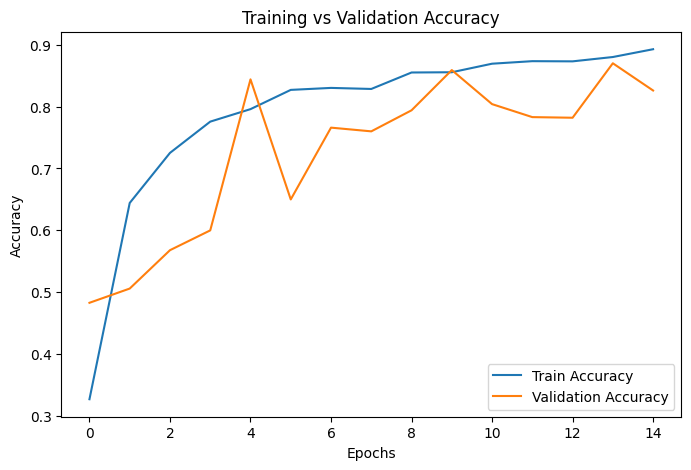

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


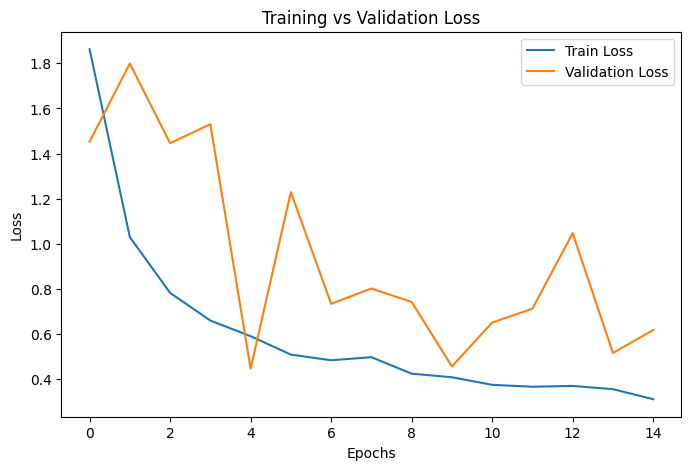

In [21]:
plt.figure(figsize=(8,5))

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [23]:
# Reset generator (important)
val_data.reset()

# Predictions
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = val_data.classes


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step


In [24]:
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)


[[ 8 17 13  5 18  8  3  6 10 12]
 [ 6 11 11  9 20  5  7 10  7 14]
 [10 11 12  4  9 11  5 13 10 15]
 [ 8 17  7  9 10  8  5 11  9 16]
 [ 5 14 11  8 14  8  7  8  9 16]
 [14 13  8  5 13 12 10  3 10 12]
 [ 5 13 10  8 10  7 11 11 10 15]
 [ 8  8 10 12  7  5 16 11  9 14]
 [12  8 13  2 11  7  7 14 11 15]
 [ 7 13 12 11 12  9 10  5 10 11]]


<Figure size 1000x800 with 0 Axes>

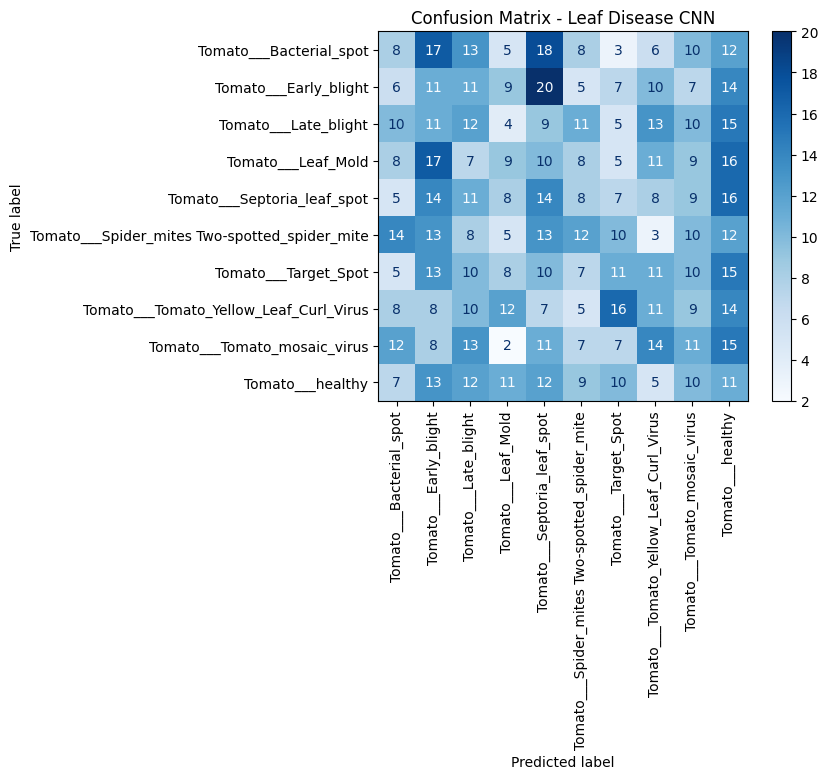

In [25]:
class_names = list(val_data.class_indices.keys())

plt.figure(figsize=(10,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=90)
plt.title("Confusion Matrix - Leaf Disease CNN")
plt.show()


In [27]:
import joblib




In [30]:
joblib.dump(model,"leaf_disease_cnn_model.joblib")

['leaf_disease_cnn_model.joblib']

In [32]:
model = joblib.load("leaf_disease_cnn_model.joblib")